# Match between Rolex clusters and MC influential nodes and PageRank

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Calculating the fractions

In [133]:
CELF_top_100_nodes = [88, 1, 3369, 6948, 407, 7551, 4, 403954, 14549, 301, 10, 339602, 408, 26, 76165, 6241, 83, 965, 35248, 267269, 383, 8756, 232850, 383474, 206362, 15, 1267, 6, 370, 5226, 2, 718, 23318, 138739, 22924, 186, 32, 11889, 2572, 38133, 392560, 50305, 398186, 133418, 8700, 42, 220, 254528, 72203, 51292, 230115, 550, 177829, 7801, 6585, 16801, 5335, 68304, 161272, 28854, 148960, 440391, 45472, 2687, 38819, 154584, 6708, 1250, 87601, 240547, 137329, 67504, 422519, 85434, 341612, 166216, 233404, 43, 154344, 5006, 442735, 128768, 3533, 93977, 144336, 198681, 60035, 4526, 40443, 445734, 400139, 295151, 227432, 154561, 79924, 14431, 67601, 258751, 364011, 349140]
CELF_top_100_nodes.sort()

In [135]:
PageRank_top_100_nodes = [88, 26, 1988, 77, 4, 677, 14454, 640, 2342, 8016, 2567, 349, 3571, 8135, 13808, 134, 5226, 27, 3335, 3998, 1343, 11714, 47794, 2320, 1390, 73, 132690, 50901, 4380, 13416, 9964, 12751, 519, 76, 408, 291, 40, 89784, 129960, 39889, 16708, 389, 511, 14440, 19706, 1270, 9914, 718, 26398, 625, 139269, 6241, 46117, 39420, 64911, 13813, 5907, 18938, 244854, 220, 14907, 52497, 1521, 14915, 11355, 15821, 3808, 228, 383, 8, 135913, 7274, 301, 31650, 288958, 126242, 8126, 11539, 99369, 15207, 456, 117680, 510, 185777, 996, 752, 198042, 9762, 48581, 64328, 83432, 69585, 25891, 80, 36795, 10159, 47010, 765, 369, 20461]
PageRank_top_100_nodes.sort()

In [131]:
len(set(CELF_top_100_nodes) & set(PageRank_top_100_nodes))/len(CELF_top_100_nodes)

0.1

In [128]:
"""Toy example"""

# Nodes from MC and PageRank
MC_nodes = [1,3,5,7]
PageRank_nodes = [3,5,4,9]

# Nodes Rolex clusters
Rolex_nodes_cluster_1 = [1,3,5,6]
Rolex_nodes_cluster_2 = [2,4,7,8]
Rolex_nodes_cluster_3 = [9,10,11,12]

# List of Rolex clusters 
Rolex_clusters = [Rolex_nodes_cluster_1, Rolex_nodes_cluster_2, Rolex_nodes_cluster_3]

In [89]:
# Dictionary to save clusters fraction of match to MC and PageRank
cluster_match = {}

# Count fraction of nodes same for MC and PageRank for each cluster 
for i, cluster in enumerate(Rolex_clusters):
    MC_fraction_same = len(set(cluster) & set(MC_nodes))/len(cluster)
    PageRank_fraction_same = len(set(cluster) & set(PageRank_nodes))/len(cluster)
    cluster_match[i+1] = [1, MC_fraction_same, PageRank_fraction_same]

In [90]:
cluster_match_df = pd.DataFrame.from_dict(cluster_match)
#cluster_match_df = pd.DataFrame.from_dict(cluster_match, orient = 'index')
cluster_match_df

,1,2,3
0,1.00,1.00,1.00
1,0.75,0.25,0.00
2,0.50,0.25,0.25


## Visualization

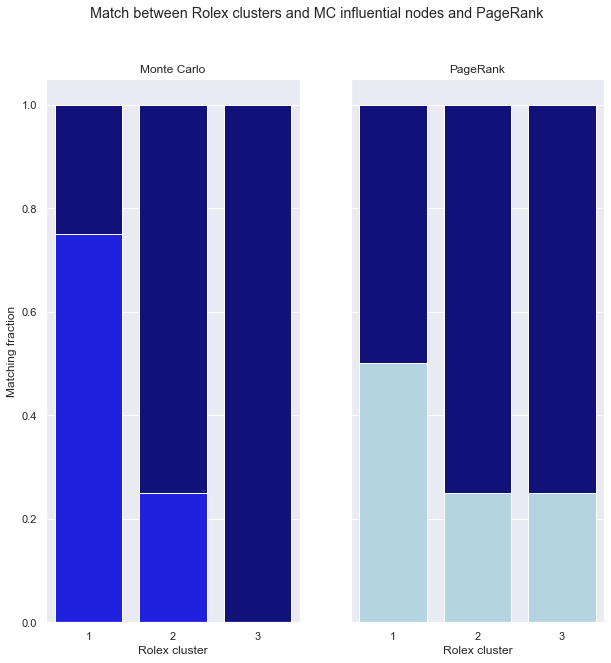

In [100]:
total = pd.DataFrame(cluster_match_df.iloc[0]).T
MC = pd.DataFrame(cluster_match_df.iloc[1]).T
PageRank = pd.DataFrame(cluster_match_df.iloc[2]).T

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
fig.suptitle('Match between Rolex clusters and MC influential nodes and PageRank')

# MC 
bar1 = sns.barplot(ax=axes[0], data=total, color='darkblue')
bar2 = sns.barplot(ax=axes[0], data=MC, color='blue')
axes[0].set_title("Monte Carlo")

# PageRank
bar1 = sns.barplot(ax=axes[1], data=total, color='darkblue')
bar2 = sns.barplot(ax=axes[1], data=PageRank, color='lightblue')
axes[1].set_title("PageRank")


axes[0].set(xlabel='Rolex cluster', ylabel='Matching fraction')
axes[1].set(xlabel='Rolex cluster')

# show the graph
plt.show()

# Find common features

In [109]:
"""Toy example"""

data = {'In-degre': [2000, 1800, 2100, 2000], 'Out-degre': [3200, 3300, 3300, 3000], 
            'Betw. Centr.': [0.9, 0.87, 0.7, 0.9]}
features_df = pd.DataFrame(data=data)

In [110]:
features_df

,In-degre,Out-degre,Betw. Centr.
0,2000,3200,0.90
1,1800,3300,0.87
2,2100,3300,0.70
3,2000,3000,0.90


## Visualization

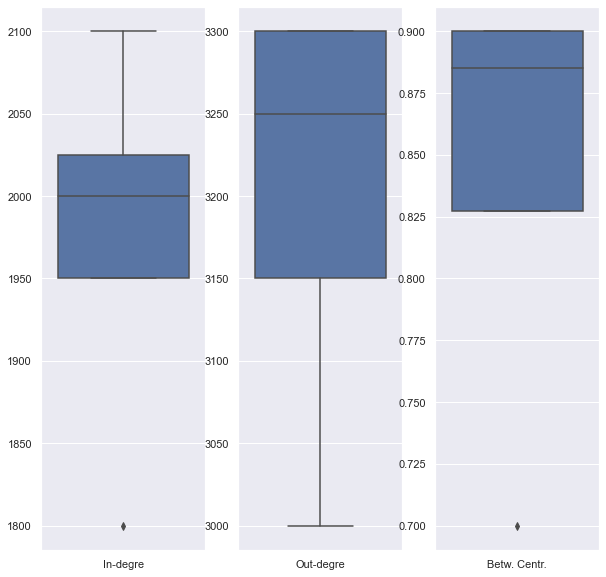

In [116]:
categorical = features_df.columns
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(data=pd.DataFrame(features_df[var]), ax=subplot)

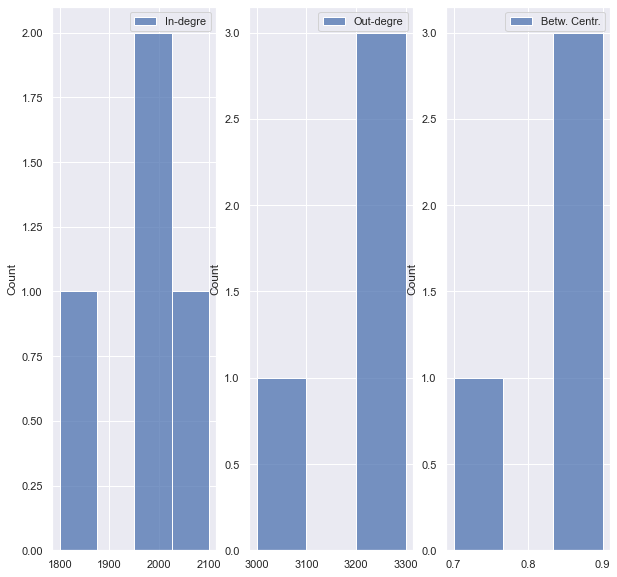

In [117]:
categorical = features_df.columns
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.histplot(data=pd.DataFrame(features_df[var]), ax=subplot)

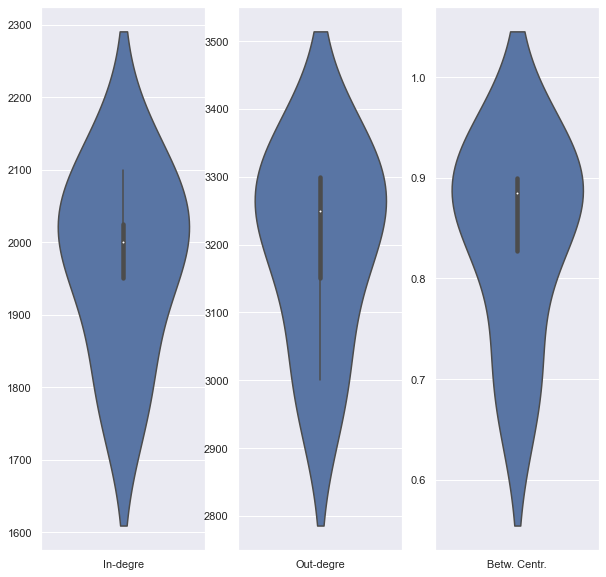

In [120]:
categorical = features_df.columns
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.violinplot(data=pd.DataFrame(features_df[var]), ax=subplot)

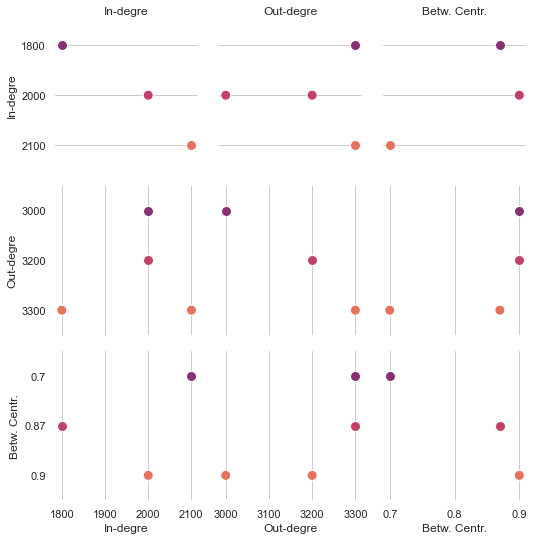

In [123]:
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(features_df.sort_values("In-degre", ascending=False))

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
#g.set( xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
titles = features_df.columns

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

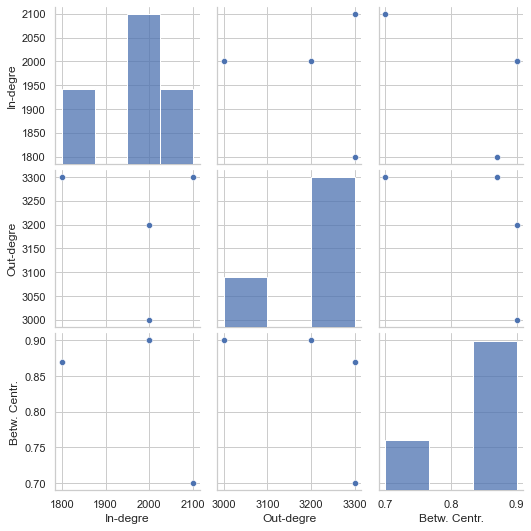

In [125]:
sns.pairplot(features_df)